In [127]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [128]:
#load the data matrics
matrix_1st=np.loadtxt('right1st.txt')
print('1 state scenario matrics has the shape:',matrix_1st.shape)

1 state scenario matrics has the shape: (1439, 7)


In [129]:
str1 = ",".join(str(i) for i in matrix_1st)
str1 = str1.split(",")
str1

['[0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 0. 1. 0. 0. 1.]',
 '[1. 0. 0. 1. 0. 1. 0.]',
 '[1. 0. 0. 1. 1. 0. 0.]',
 '[1. 0. 1. 0. 0. 0. 1.]',
 '[1. 0. 1. 0. 1. 0. 0.]',
 '[1. 1. 0. 0. 0. 0. 1.]',
 '[1. 1. 0. 0. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 0. 0.]',
 '[2. 0. 0. 2. 0. 0. 2.]',
 '[2. 0. 0. 2. 0. 1. 1.]',
 '[2. 0. 0. 2. 0. 2. 0.]',
 '[2. 0. 0. 2. 1. 1. 0.]',
 '[2. 0. 0. 2. 2. 0. 0.]',
 '[2. 0. 1. 1. 0. 0. 2.]',
 '[2. 0. 1. 1. 0. 1. 1.]',
 '[2. 0. 1. 1. 2. 0. 0.]',
 '[2. 1. 0. 1. 0. 0. 2.]',
 '[2. 1. 0. 1. 0. 1. 1.]',
 '[2. 1. 0. 1. 0. 2. 0.]',
 '[2. 1. 0. 1. 1. 0. 1.]',
 '[2. 1. 0. 1. 1. 1. 0.]',
 '[2. 1. 0. 1. 2. 0. 0.]',
 '[2. 1. 1. 0. 0. 0. 2.]',
 '[2. 1. 1. 0. 0. 1. 1.]',
 '[2. 1. 1. 0. 1. 0. 1.]',
 '[2. 1. 1. 0. 1. 1. 0.]',
 '[2. 1. 1. 0. 2. 0. 0.]',
 '[2. 2. 0. 0. 0. 0. 2.]',
 '[2. 2. 0. 0. 0. 1. 1.]',
 '[2. 2. 0. 0. 0. 2. 0.]',
 '[2. 2. 0. 0. 1. 0. 1.]',
 '[2. 2. 0. 0. 1. 1. 0.]',
 '[2. 2. 0. 0. 2. 0. 0.]',
 '[3. 0. 0. 3. 0. 0. 3.]',
 '[3. 0. 0. 3. 0. 1. 2.]',
 '[3. 0. 0. 3. 0. 2. 1.]',
 

# weight [2,3,1,1,2,1]

In [115]:
weight = [2,3,1,1,2,1]

matrix1 = matrix_1st[:,1:]
matrix1.shape

matrixst1 = matrix1
matrixst1

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ...,
       [ 0.,  0., 16.,  0., 10.,  6.],
       [ 0.,  0., 16.,  0., 11.,  5.],
       [ 0.,  0., 17.,  0., 12.,  5.]])

In [116]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
clustering1 = DBSCAN(0.5,10).fit(matrix1st)
label1 = clustering1.labels_
print(len(np.unique(clustering1.labels_)))
print(clustering1.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

3
[0 0 0 ... 0 0 0]


In [117]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
eps=[]
np1=[]
#score = np.zeros((25,20))
score = []
for k in range(0, 25):
    ep = 0.26 + 0.01*k
    for i in range(0,20):   
        npp = 10 +10*i
        dbscan = DBSCAN(ep,npp).fit(matrix1st)
        labels = dbscan.labels_
        try:
            ch = metrics.calinski_harabasz_score(matrix1st, labels)
            print(ep,npp,ch)
            eps.append(ep)
            np1.append(npp)
            #score[k,i]=ch
            score.append(ch)
        except ValueError:
            print('shit!')

0.26 10 735.5147573484223
0.26 20 229.05293625431005
0.26 30 32.15464930745354
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.27 10 747.9342815844196
0.27 20 437.10249895847704
0.27 30 71.19460933998522
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.28 10 753.9755122704948
0.28 20 610.3833983403069
0.28 30 128.97907869754954
0.28 40 18.499873294395677
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.29000000000000004 10 761.7070305114271
0.29000000000000004 20 723.6008014086328
0.29000000000000004 30 570.832117113889
0.29000000000000004 40 154.54792564344135
0.29000000000000004 50 23.760605307139286
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.3 10 760.3602363459456
0.3 20 739.7176702059081
0.3 30 644.8702631396085
0.3 40 312.31729356639323
0.3 50 86.52375067069836
shit!
shit!
sh

0.49 100 707.6125980056947
0.49 110 669.5969186333682
0.49 120 626.7994173006049
0.49 130 556.1211067881366
0.49 140 465.2645764786422
0.49 150 348.53688908876956
0.49 160 479.07916181433205
0.49 170 353.41697726243115
0.49 180 243.21837392145926
0.49 190 148.78300606753191
shit!
0.5 10 758.0357645513272
0.5 20 757.6060072454454
0.5 30 756.2625248505725
0.5 40 753.2894620407598
0.5 50 756.1494111804296
0.5 60 753.1503984207635
0.5 70 754.8460799926166
0.5 80 752.6899057659779
0.5 90 744.9975147144744
0.5 100 729.2267618592774
0.5 110 703.943776334584
0.5 120 676.748113541971
0.5 130 638.0810752101931
0.5 140 555.9653462651962
0.5 150 504.29830456544727
0.5 160 343.4493800792429
0.5 170 512.2653046462782
0.5 180 373.2283147784308
0.5 190 261.02476974522835
0.5 200 176.41699074853622


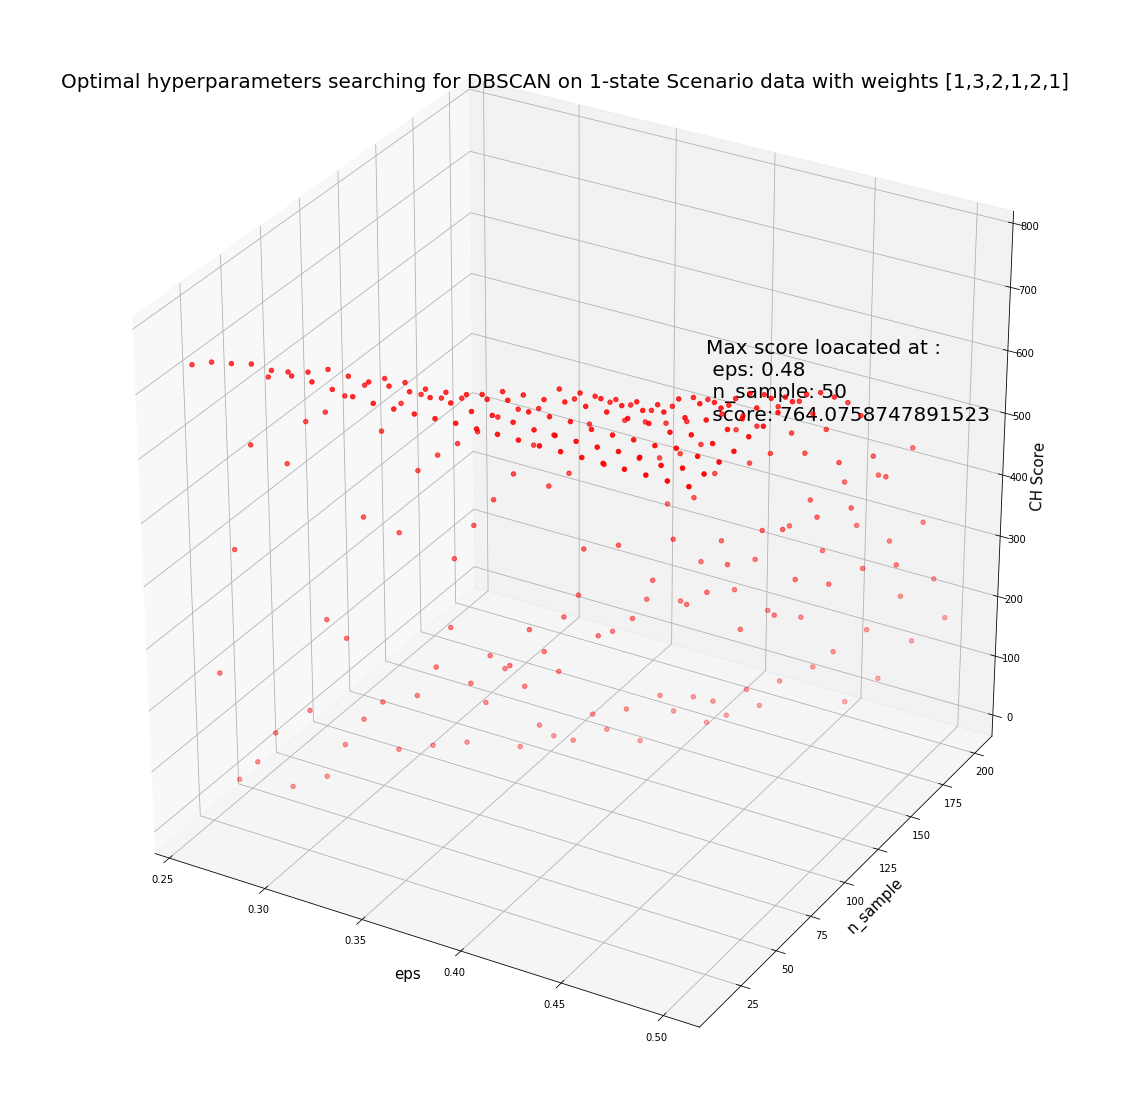

In [118]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
#x_surf, y_surf = np.meshgrid(eps, np)
#ax.plot_surface(eps, np,score ,rstride=1,cstride=1,cmap=plt.cm.hot)
#ax.contourf(X,Y,Z,offset=2,alpha=0.75,cmap=plt.cm.hot)
#ax.contour(x_surf, y_surf, score, offset=-2, colors='black')
#ax.plot_trisurf(eps, np1,score.ravel(), cmap=plt.cm.hot,shade=True)
#ax.contour(eps, np1,score[::-1],offset=2,alpha=0.75,cmap=plt.cm.hot)
#max1 = np.argmax(score)
max_indx = np.argmax(score)
show_max='Max score loacated at :\n eps: '+str(eps[max_indx])+' \n n_sample: '+str(np1[max_indx])+' \n score: '+str(score[max_indx])+''
#plt.annotate(show_max,xytext=(eps[max_indx],np1[max_indx],score[max_indx]),xy=(eps[max_indx],np1[max_indx],score[max_indx]))
ax.text(eps[max_indx],np1[max_indx],score[max_indx], show_max , size=20, zorder=1,color='k')
ax.scatter(eps, np1, score, c='red', cmap=plt.cm.hot)
ax.set_title('Optimal hyperparameters searching for DBSCAN on 1-state Scenario data with weights [1,3,2,1,2,1]',fontsize = 20)
ax.set_xlabel('eps',fontsize = 15)
ax.set_ylabel('n_sample',fontsize = 15)
ax.set_zlabel('CH Score',fontsize = 15)
plt.show()

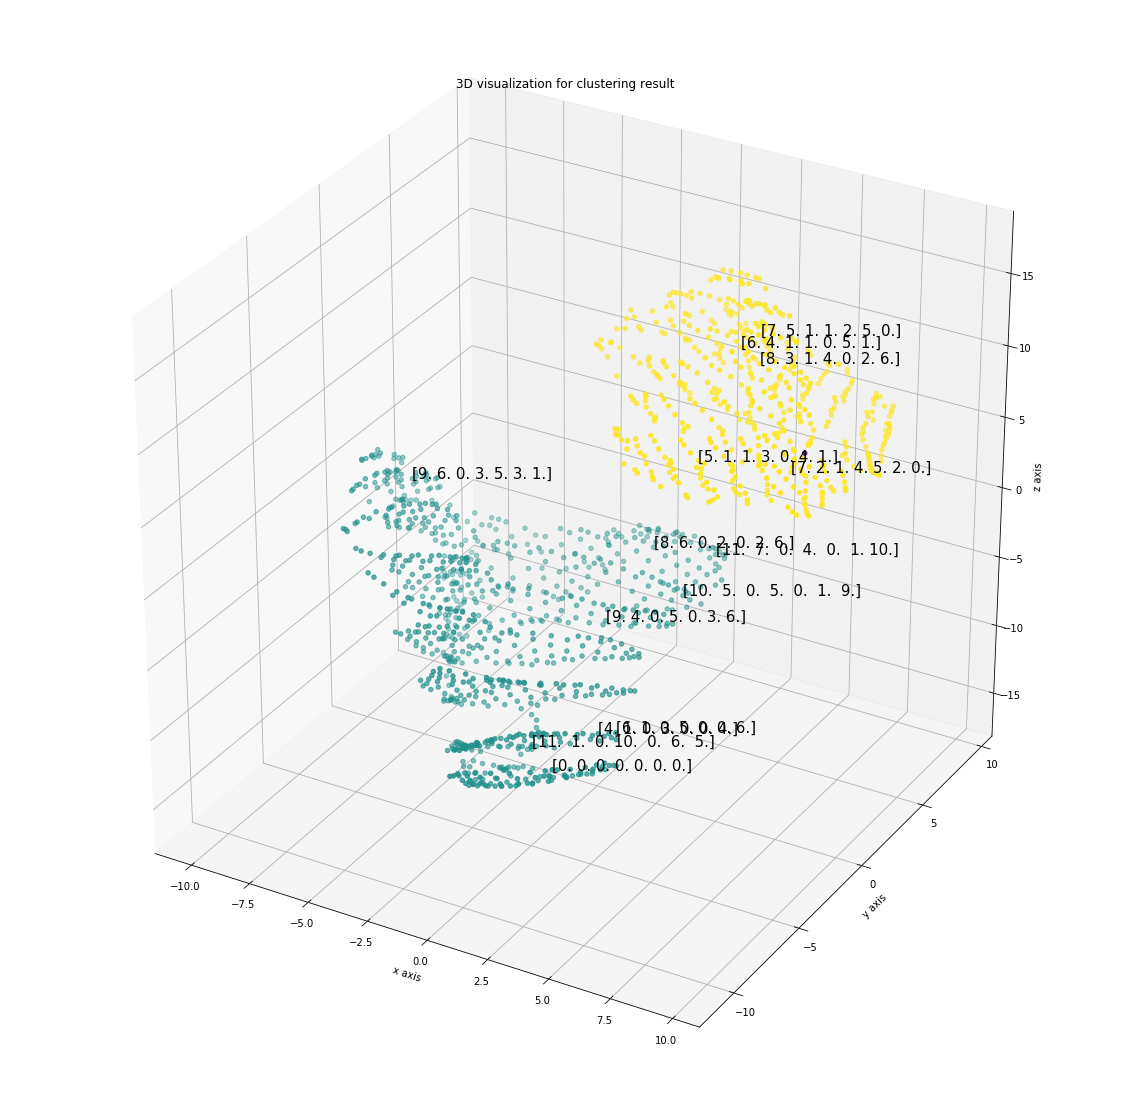

In [58]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x0 = [] 
y0 = []
z0 = []
pred0 = []
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
x5 = [] 
y5 = []
z5 = []
pred5 = []
x6 = [] 
y6 = []
z6 = []
pred6 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(clustering1.labels_[i])
for i in range(len(data[:,0])):
    if clustering1.labels_[i] == -1:
        x0.append(data[i,0])
        y0.append(data[i,1])
        z0.append(data[i,2])
        pred0.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 3:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 4:
        x5.append(data[i,0])
        y5.append(data[i,1])
        z5.append(data[i,2])
        pred5.append(clustering1.labels_[i])
    else:
        x6.append(data[i,0])
        y6.append(data[i,1])
        z6.append(data[i,2])
        pred6.append(clustering1.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
#ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
#ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
#ax.scatter(x5, y5, z5, c = '#800080',label = 'Cluster 5')
ax.scatter(x0, y0, z0, c = 'orange',label = 'Outlier')
for i in range(int(len(data)/1000)):
    ax.text(x[1000*i], y[1000*i], z[1000*i],str1[1000*i],
             fontsize=15)
plt.title("3D visualization for DBSCAN clustering result in case of [1,1,1,1,1,1]",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()


# weight [1,1,1,1,1,1]

In [119]:
weight = [1,1,1,1,1,1]

matrix1 = matrix_1st[:,1:]
matrix1.shape

matrixst1 = matrix1

matrixst1

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ...,
       [ 0.,  0., 16.,  0., 10.,  6.],
       [ 0.,  0., 16.,  0., 11.,  5.],
       [ 0.,  0., 17.,  0., 12.,  5.]])

In [122]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
clustering2 = DBSCAN(0.28,80).fit(matrix1st)
label2 = clustering2.labels_
print(len(np.unique(clustering2.labels_)))
print(clustering2.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

3
[ 0  0  0 ... -1 -1 -1]


In [123]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
eps1=[]
np11=[]
#score = np.zeros((25,20))
score1 = []
for k in range(0, 25):
    ep = 0.26 + 0.01*k
    for i in range(0,20):   
        npp = 10 +10*i
        dbscan = DBSCAN(ep,npp).fit(matrix1st)
        labels = dbscan.labels_
        try:
            ch = metrics.calinski_harabasz_score(matrix1st, labels)
            print(ep,npp,ch)
            eps1.append(ep)
            np11.append(npp)
            #score[k,i]=ch
            score1.append(ch)
        except ValueError:
            print('shit!')

0.26 10 202.55686857112806
0.26 20 207.33972774632
0.26 30 208.81210707806343
0.26 40 208.1425527834484
0.26 50 217.962293038918
0.26 60 226.3013638180479
0.26 70 246.54929202445402
0.26 80 206.82594822657555
0.26 90 179.01746676122218
0.26 100 134.03866866433154
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.27 10 202.48200596325321
0.27 20 204.51012767402932
0.27 30 208.81210707806343
0.27 40 207.9346410965726
0.27 50 218.12700587147134
0.27 60 221.14251573838044
0.27 70 235.21418324743567
0.27 80 219.82100116600705
0.27 90 128.4147266127801
0.27 100 152.8857045268303
0.27 110 59.03350781400626
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.28 10 202.48200596325321
0.28 20 203.49764593789257
0.28 30 209.38078665074624
0.28 40 211.6354322614801
0.28 50 215.25550611662516
0.28 60 220.21255923647647
0.28 70 235.4383611419222
0.28 80 240.3665299274628
0.28 90 243.7024584511272
0.28 100 135.67736711087028
0.28 110 172.13852219771636
0.28 120 144.20636890837042
shit

0.41000000000000003 170 217.66698674960335
0.41000000000000003 180 217.28553093510627
0.41000000000000003 190 220.8029756641931
0.41000000000000003 200 223.33603510488808
0.42000000000000004 10 202.16636203637037
0.42000000000000004 20 202.16636203637037
0.42000000000000004 30 202.16636203637037
0.42000000000000004 40 202.16636203637037
0.42000000000000004 50 202.16636203637037
0.42000000000000004 60 202.16636203637037
0.42000000000000004 70 201.68348257118376
0.42000000000000004 80 201.76879058874664
0.42000000000000004 90 201.76879058874664
0.42000000000000004 100 204.6687860723231
0.42000000000000004 110 204.6687860723231
0.42000000000000004 120 204.65073976838477
0.42000000000000004 130 204.76372208102808
0.42000000000000004 140 204.76372208102808
0.42000000000000004 150 204.83356751758885
0.42000000000000004 160 209.5495225918645
0.42000000000000004 170 210.42347151718732
0.42000000000000004 180 211.22263083452137
0.42000000000000004 190 212.8663373187016
0.42000000000000004 200 2

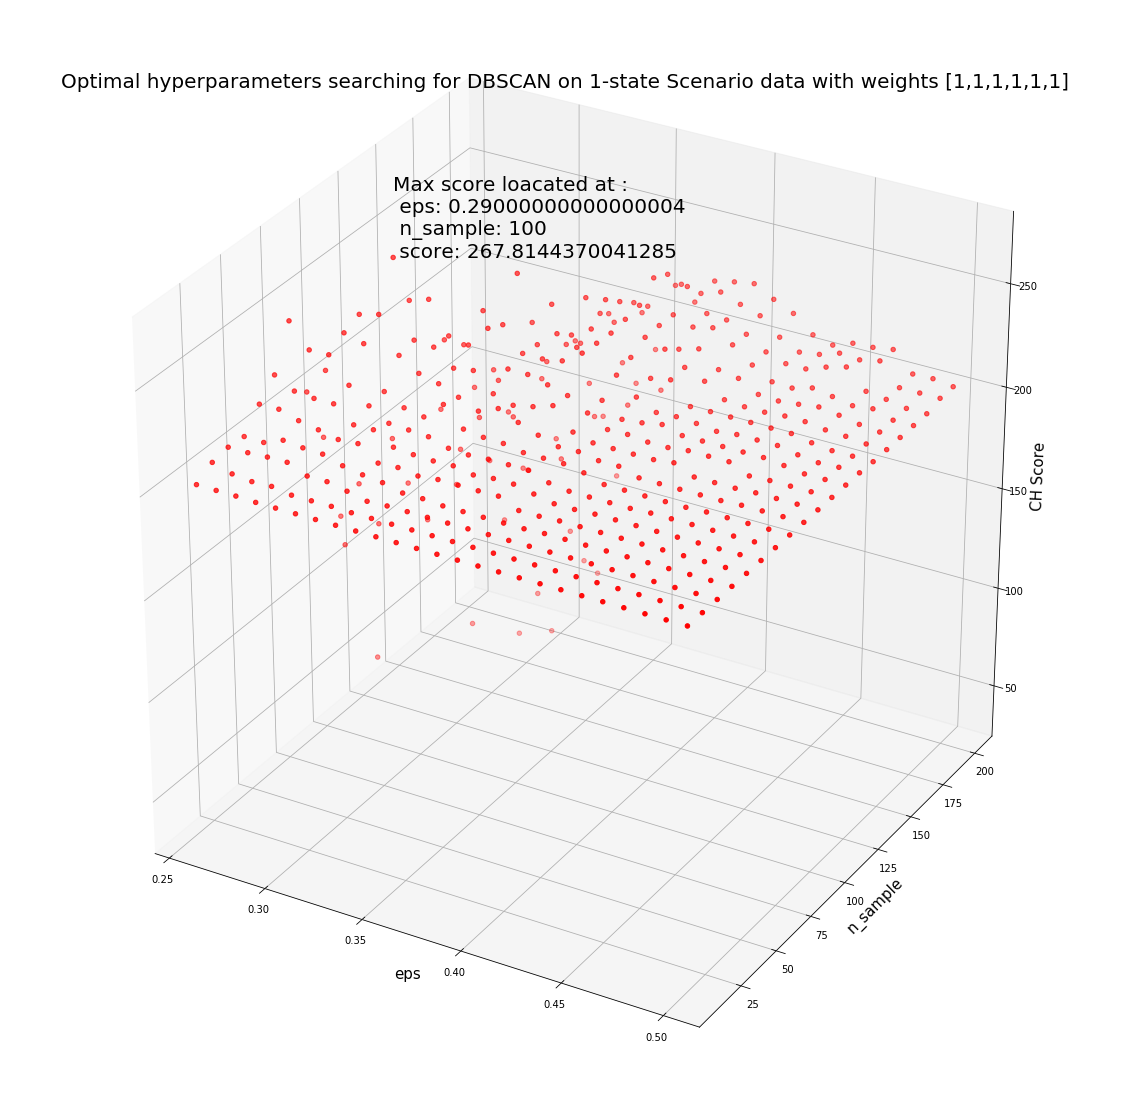

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
#x_surf, y_surf = np.meshgrid(eps, np)
#ax.plot_surface(eps, np,score ,rstride=1,cstride=1,cmap=plt.cm.hot)#生成一个曲面
#ax.contourf(X,Y,Z,offset=2,alpha=0.75,cmap=plt.cm.hot)#为等高线填充颜色
#ax.contour(x_surf, y_surf, score, offset=-2, colors='black')
#ax.plot_trisurf(eps, np1,score.ravel(), cmap=plt.cm.hot,shade=True)
#ax.contour(eps, np1,score[::-1],offset=2,alpha=0.75,cmap=plt.cm.hot)
#max1 = np.argmax(score)
max_indx = np.argmax(score1)
show_max='Max score loacated at :\n eps: '+str(eps1[max_indx])+' \n n_sample: '+str(np11[max_indx])+' \n score: '+str(score1[max_indx])+''
#plt.annotate(show_max,xytext=(eps[max_indx],np1[max_indx],score[max_indx]),xy=(eps[max_indx],np1[max_indx],score[max_indx]))
ax.text(eps1[max_indx],np11[max_indx],score1[max_indx], show_max , size=20, zorder=1,color='k')
ax.scatter(eps1, np11, score1, c='red', cmap=plt.cm.hot)
ax.set_title('Optimal hyperparameters searching for DBSCAN on 1-state Scenario data with weights [1,1,1,1,1,1]',fontsize = 20)
ax.set_xlabel('eps',fontsize = 15)
ax.set_ylabel('n_sample',fontsize = 15)
ax.set_zlabel('CH Score',fontsize = 15)
plt.show()

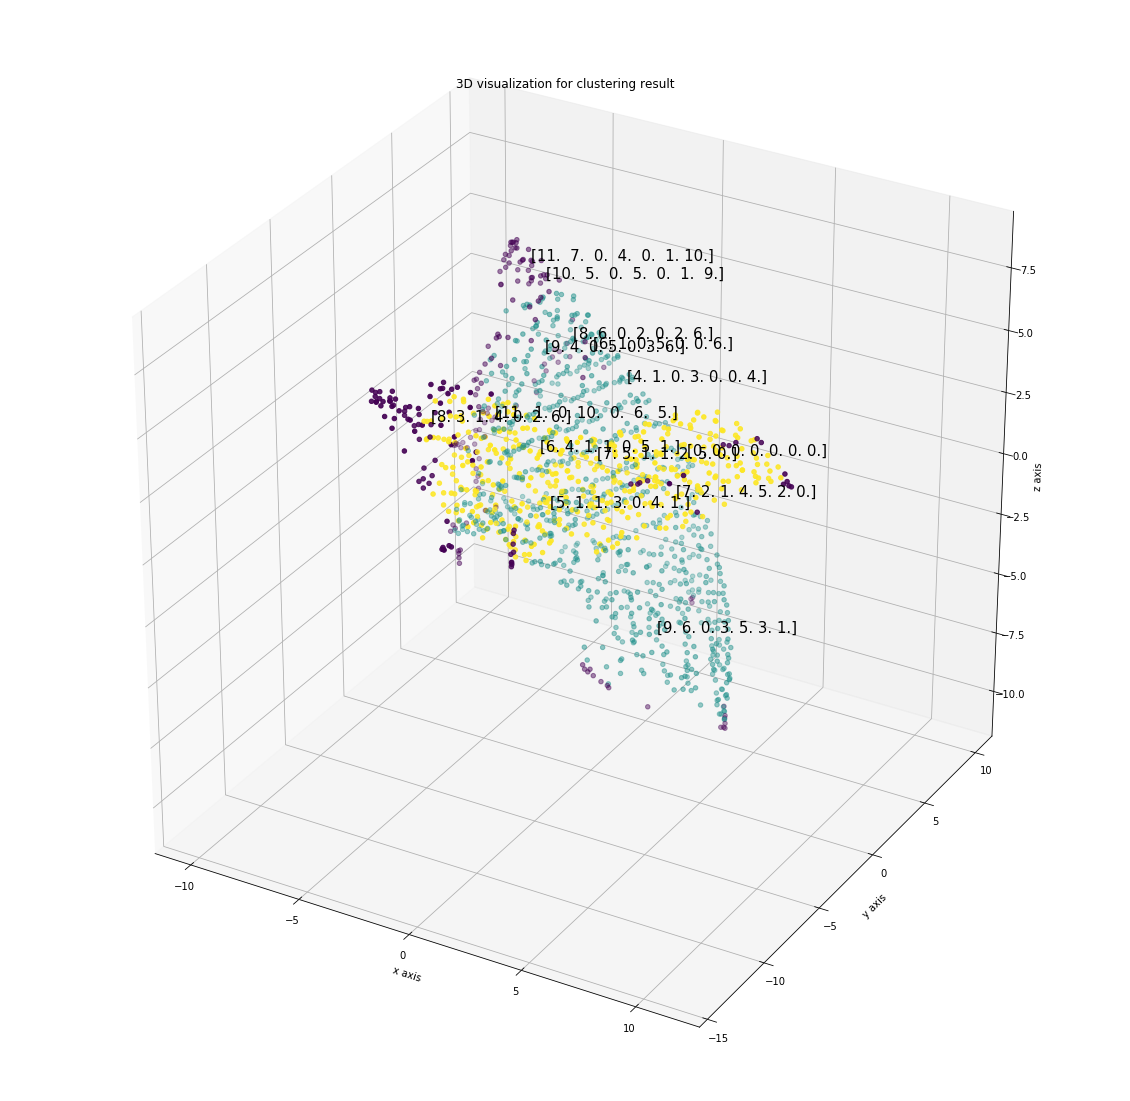

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x0 = [] 
y0 = []
z0 = []
pred0 = []
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
x5 = [] 
y5 = []
z5 = []
pred5 = []
x6 = [] 
y6 = []
z6 = []
pred6 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(clustering2.labels_[i])
for i in range(len(data[:,0])):
    if clustering2.labels_[i] == -1:
        x0.append(data[i,0])
        y0.append(data[i,1])
        z0.append(data[i,2])
        pred0.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 3:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 4:
        x5.append(data[i,0])
        y5.append(data[i,1])
        z5.append(data[i,2])
        pred5.append(clustering2.labels_[i])
    else:
        x6.append(data[i,0])
        y6.append(data[i,1])
        z6.append(data[i,2])
        pred6.append(clustering2.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
#ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
#ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
#ax.scatter(x5, y5, z5, c = '#800080',label = 'Cluster 5')
ax.scatter(x0, y0, z0, c = 'orange',label = 'Outlier')
for i in range(int(len(data)/1000)):
    ax.text(x[1000*i], y[1000*i], z[1000*i],str1[1000*i],
             fontsize=15)
plt.title("3D visualization for DBSCAN clustering result in case of [1,1,1,1,1,1]",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()

# weight [1,3,1,1,1,1]

In [130]:
weight = [1,3,1,1,1,1]

matrix1 = matrix_1st[:,1:]
matrix1.shape

matrixst1 = matrix1

matrixst1

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       ...,
       [ 0.,  0., 16.,  0., 10.,  6.],
       [ 0.,  0., 16.,  0., 11.,  5.],
       [ 0.,  0., 17.,  0., 12.,  5.]])

In [131]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
clustering3 = DBSCAN(0.28,80).fit(matrix1st)
label3 = clustering3.labels_
print(len(np.unique(clustering3.labels_)))
print(clustering3.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

3
[ 0  0  0 ... -1 -1 -1]


In [135]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
eps2=[]
np12=[]
score2 = np.zeros((25,20))
#score2 = []
for k in range(0, 25):
    ep = 0.26 + 0.01*k
    for i in range(0,20):   
        npp = 10 +10*i
        dbscan = DBSCAN(ep,npp).fit(matrix1st)
        labels = dbscan.labels_
        try:
            ch = metrics.calinski_harabasz_score(matrix1st, labels)
            print(ep,npp,ch)
            eps2.append(ep)
            np12.append(npp)
            score2[k,i]=ch
            #score2.append(ch)
        except ValueError:
            print('shit!')

0.26 10 1732.5912282103002
0.26 20 1705.468721829716
0.26 30 1661.0414455885505
0.26 40 1568.7557093046187
0.26 50 1486.369631518356
0.26 60 1299.6088393360444
0.26 70 1036.8577489400247
0.26 80 633.3222599580806
0.26 90 500.0315497675026
0.26 100 280.5122912609163
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.27 10 1756.149201768383
0.27 20 1713.462092727422
0.27 30 1661.0414455885505
0.27 40 1572.5255169024726
0.27 50 1493.0793341133226
0.27 60 1336.0023855925922
0.27 70 1078.7864724876656
0.27 80 728.2077592470305
0.27 90 385.72844273452085
0.27 100 377.98011583963114
0.27 110 92.55943128248215
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.28 10 1756.149201768383
0.28 20 1721.664050536234
0.28 30 1689.4000306622409
0.28 40 1658.9465954302698
0.28 50 1572.7342762709493
0.28 60 1494.827582759724
0.28 70 1369.4344023107449
0.28 80 1143.2338116081376
0.28 90 807.0889310979351
0.28 100 356.2234754380084
0.28 110 461.12595001161503
0.28 120 311.0354616799319
shit

0.41000000000000003 170 1623.4104984589553
0.41000000000000003 180 1576.7594073026223
0.41000000000000003 190 1519.4998439800609
0.41000000000000003 200 1501.2682872273053
0.42000000000000004 10 1763.318954516908
0.42000000000000004 20 1763.318954516908
0.42000000000000004 30 1763.318954516908
0.42000000000000004 40 1763.318954516908
0.42000000000000004 50 1763.318954516908
0.42000000000000004 60 1763.318954516908
0.42000000000000004 70 1730.2959477216348
0.42000000000000004 80 1730.5201418057331
0.42000000000000004 90 1730.5201418057331
0.42000000000000004 100 1719.3759480913363
0.42000000000000004 110 1719.3759480913363
0.42000000000000004 120 1717.2619864617131
0.42000000000000004 130 1707.2674858192327
0.42000000000000004 140 1707.2674858192327
0.42000000000000004 150 1687.1291318944911
0.42000000000000004 160 1653.8890095053914
0.42000000000000004 170 1636.5700082354679
0.42000000000000004 180 1635.6135627599097
0.42000000000000004 190 1585.732058875153
0.42000000000000004 200 154

ValueError: shape mismatch: objects cannot be broadcast to a single shape

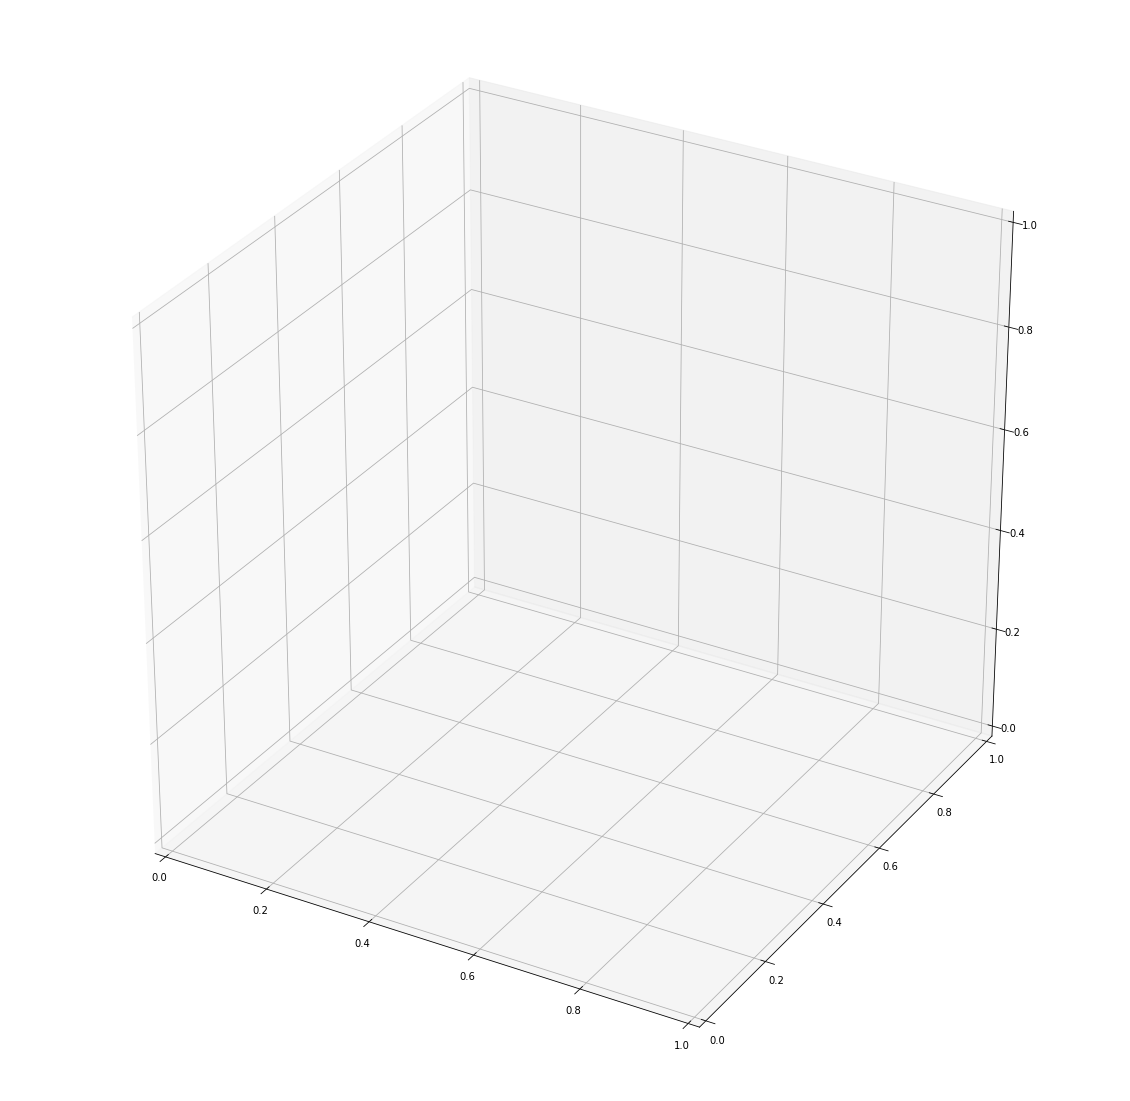

In [136]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
score2 = score2.ravel()
#x_surf, y_surf = np.meshgrid(eps, np)

#ax.contour(x_surf, y_surf, score, offset=-2, colors='black')
#ax.plot_trisurf(eps, np1,score.ravel(), cmap=plt.cm.hot,shade=True)
#ax.contour(eps, np1,score[::-1],offset=2,alpha=0.75,cmap=plt.cm.hot)
#max1 = np.argmax(score)
max_indx = np.argmax(score2)
show_max='Max score loacated at :\n eps: '+str(eps2[max_indx])+' \n n_sample: '+str(np12[max_indx])+' \n score: '+str(score2[max_indx])+''
#plt.annotate(show_max,xytext=(eps[max_indx],np1[max_indx],score[max_indx]),xy=(eps[max_indx],np1[max_indx],score[max_indx]))
ax.text(eps2[max_indx],np12[max_indx],score2[max_indx], show_max , size=20, zorder=1,color='k')
ax.scatter(eps2, np12, score2, c='red', cmap=plt.cm.hot)
ax.set_title('Optimal hyperparameters searching for DBSCAN on 1-state Scenario data with weights [1,3,1,1,1,1]',fontsize = 20)
ax.set_xlabel('eps',fontsize = 15)
ax.set_ylabel('n_sample',fontsize = 15)
ax.set_zlabel('CH Score',fontsize = 15)
plt.show()

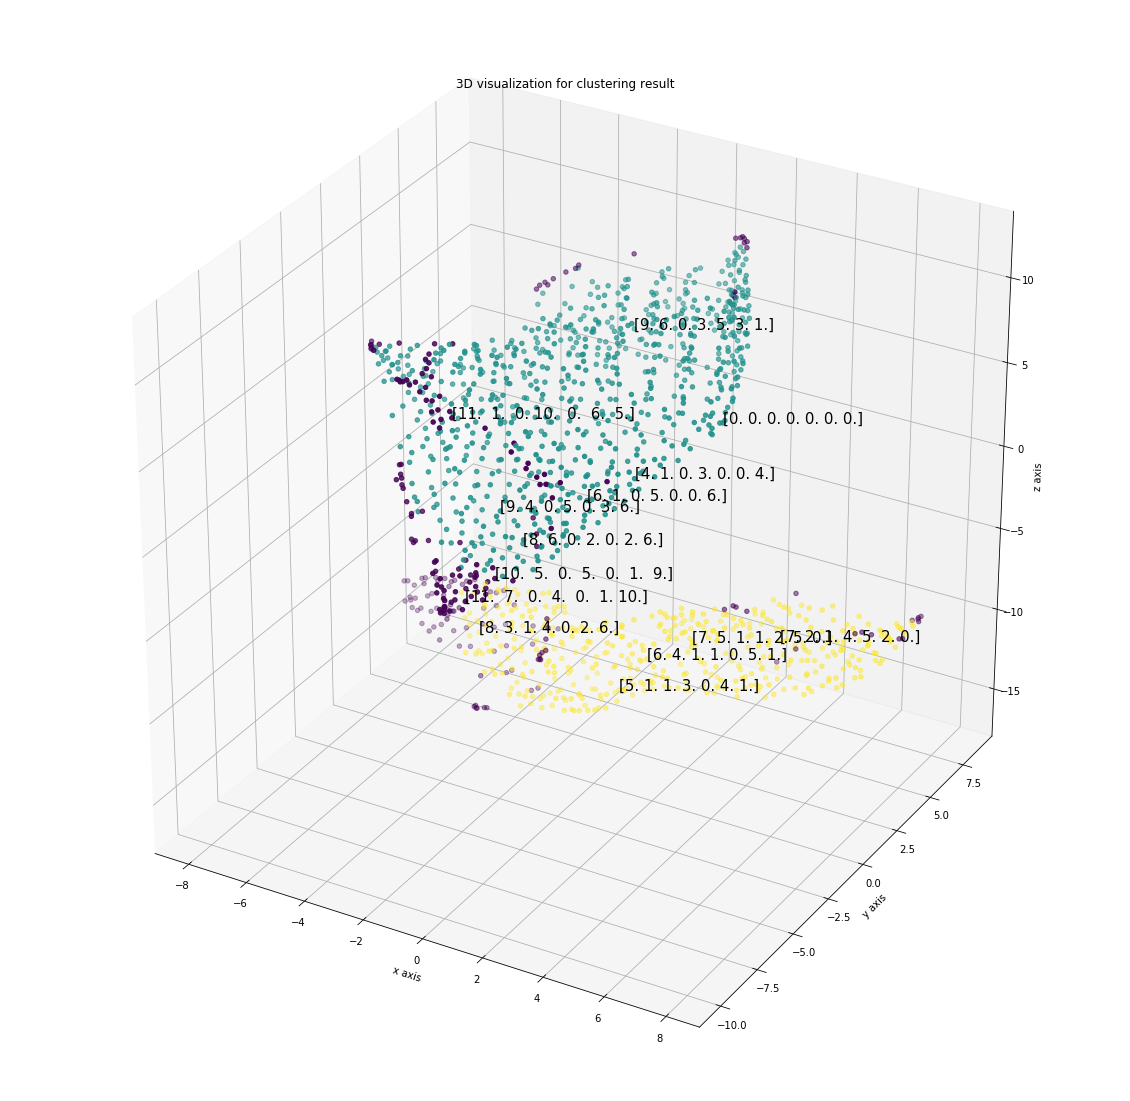

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x0 = [] 
y0 = []
z0 = []
pred0 = []
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
x5 = [] 
y5 = []
z5 = []
pred5 = []
x6 = [] 
y6 = []
z6 = []
pred6 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(clustering3.labels_[i])
for i in range(len(data[:,0])):
    if clustering3.labels_[i] == -1:
        x0.append(data[i,0])
        y0.append(data[i,1])
        z0.append(data[i,2])
        pred0.append(clustering3.labels_[i])
    if clustering3.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(clustering3.labels_[i])
    if clustering3.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(clustering3.labels_[i])
    if clustering3.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(clustering3.labels_[i])
    if clustering3.labels_[i] == 3:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(clustering3.labels_[i])
    if clustering3.labels_[i] == 4:
        x5.append(data[i,0])
        y5.append(data[i,1])
        z5.append(data[i,2])
        pred5.append(clustering3.labels_[i])
    else:
        x6.append(data[i,0])
        y6.append(data[i,1])
        z6.append(data[i,2])
        pred6.append(clustering3.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
#ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
#ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
#ax.scatter(x5, y5, z5, c = '#800080',label = 'Cluster 5')
ax.scatter(x0, y0, z0, c = 'orange',label = 'Outlier')
for i in range(int(len(data)/1000)):
    ax.text(x[1000*i], y[1000*i], z[1000*i],str1[1000*i],
             fontsize=15)
plt.title("3D visualization for DBSCAN clustering result in case of [1,3,1,1,1,1]",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()